In [1]:
# pip install pymssql
import pymssql
import pandas as pd

pd.options.display.max_columns = None

C:\Users\rmr\AppData\Local\Continuum\anaconda3\envs\class\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


In [2]:
load_csv = True

In [3]:
if load_csv == True:
    df_sku = pd.read_csv('df_sku.csv')

In [4]:
if load_csv == False:
    sqluser = input('Enter SQL User')
    sqlpass = input(f'Enter Password for {sqluser}')
    ## instance a python db connection object- same form as psycopg2/python-mysql drivers also
    conn = pymssql.connect(server="192.168.254.13", user=sqluser,password=passwrd, port=1433)  # You can lookup the port number inside SQL server. 

    stmt = "SELECT \
            SKU_ID \
            ,UOM_ID \
            ,SalesCategoryID \
            ,cat.CategoryID \
            ,NACSCategoryID \
            ,Category \
            ,Description \
            ,LongDescription \
            ,ShortDescription \
            ,POSDescription \
            FROM AgilityPB.dbo.tbl_SKU sku \
            left outer join Agility_Net.dbo.tbl_Categories cat on sku.SalesCategoryID = cat.CategoryID"
    # Excute Query here
    df_sku = pd.read_sql(stmt,conn)
    df_sku.to_csv('df_sku.csv')

In [5]:
df_sku.head()

,Unnamed: 0,SKU_ID,UOM_ID,SalesCategoryID,CategoryID,NACSCategoryID,Category,Description,LongDescription,ShortDescription,POSDescription
0,0,1,119,40,40,140,General Merchandise,General Merchandise,1000 DRINKING GAMES IN A BOX,1000 DRINK GAME,1000 DRINKING GAMES
1,1,2,119,52,52,91,Salty Snacks,Salty Snacks Inv,2/$1 RED HOT SAUSAGE,MEAT SNACK RH,2/$1 RED HOT SAUSAGE
2,2,3,119,52,52,91,Salty Snacks,Salty Snacks Inv,20 COUNT VARIETY PACK,VARIETY 20CT,20 COUNT VARIETY PACK
3,3,4,119,52,52,91,Salty Snacks,Salty Snacks Inv,26 CT 100 CALORIE VARIETY PACK,VARIETY 100CAL,26CT 100 CALORIE VARIETY
4,4,5,119,52,52,91,Salty Snacks,Salty Snacks Inv,3 CHEESE MEDLEY NIBBLERS,PRETZEL 3 CHEESE,3 CHEESE MEDLEY NIBBLERS


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [7]:
#generate our dataset
dataset = make_blobs(n_samples=200
                    ,centers=4
                    ,n_features=2
                    ,cluster_std=1.6
                    ,random_state=50)


In [8]:
points = dataset[0]

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=4)

In [12]:
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

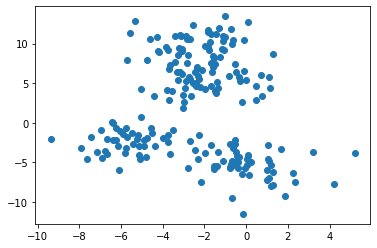

In [16]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [17]:
clusters = kmeans.cluster_centers_

In [18]:
print(clusters)

[[-5.56465793 -2.34988939]
 [-1.92101646  5.21673484]
 [ 0.05161133 -5.35489826]
 [-2.40167949 10.17352695]]


In [19]:
y_km = kmeans.fit_predict(points)

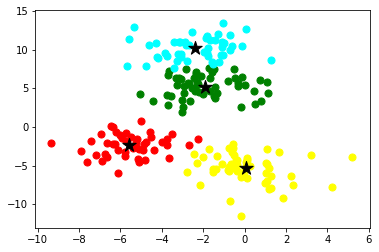

In [26]:
plt.scatter(points[y_km == 0,0], points[y_km == 0,1], s=50, color='red')
plt.scatter(points[y_km == 1,0], points[y_km == 1,1], s=50, color='green')
plt.scatter(points[y_km == 2,0], points[y_km == 2,1], s=50, color='yellow')
plt.scatter(points[y_km == 3,0], points[y_km == 3,1], s=50, color='cyan')

# mark our centroids
plt.scatter(clusters[0,0], clusters[0,1], s=200, color='black', marker='*')
plt.scatter(clusters[1,0], clusters[1,1], s=200, color='black', marker='*')
plt.scatter(clusters[2,0], clusters[2,1], s=200, color='black', marker='*')
plt.scatter(clusters[3,0], clusters[3,1], s=200, color='black', marker='*')

plt.show()

In [27]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

In [28]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_sku, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [31]:
profile.to_file(output_file="your_report.html")